# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
* Creating a CNN model to recognize facial emotion expressions can be determinant to stop sleep/tired drivers to keep driving as it may cause risk to him/her and others around.
* A Facial Emotion Recognition CNN model can also be used to understand rater a customer is enjoying the product or not, without violating ones right of privacy, and enhancing soforth user experience.

**The objectives:** What is the intended goal?<br>
* The goal is to provide an accurate real world Facial Expression Recognition CNN Model.

**The key questions:** What are the key questions that need to be answered?<br>
* Which color mode is better for a Facial Emotion Recognition CNN Model, Grayscale or RGB?
* Is an ANN or a CNN better for the facial emotion recognition approach?
* Is our final model performing well? Why?
    

**The problem formulation:** What are we trying to solve using data science?
* Checking if the dataset is properly balanced and acting on it in case it needs to be refactored.
* Data Science can provide us usefull insights while visually analyzing data to grab a great overview of the performance of the model by plotting graphs and confusion matrix of the choosen model. 
    


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

* ‘happy’: Images of people who have happy facial expressions.<br>
* ‘sad’: Images of people with sad or upset facial expressions.<br>
* ‘surprise’: Images of people who have shocked or surprised facial expressions.<br>
* ‘neutral’: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Importing the Libraries**

In [1]:
import os
import math
import random
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import h5py

# Scikit-learn imports
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# TensorFlow and Keras imports
import tensorflow as tf

# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Flatten, Conv2D, MaxPooling2D, 
    BatchNormalization, LeakyReLU
)

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Ignore warnings due to deprecations
import warnings
warnings.filterwarnings("ignore")


### **Let us load and unzip the data**

In [2]:
def load_images_and_labels_from_folder(folder_path):
    images = []
    labels = []
    class_names = ['happy', 'neutral', 'sad', 'surprise']
    
    print(f"Loading data from: {folder_path}")
    
    for label in class_names:
        class_path = os.path.join(folder_path, label)
        if not os.path.exists(class_path):
            print(f"Class path does not exist: {class_path}")
            continue
        
        print(f"Processing class: {label}")
        
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            
            # Debug: Print out file paths being processed
            # print(f"Found file: {img_path}")

            # Adjust this depending on your image types
            if img_path.endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img = Image.open(img_path).convert('RGB')
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)

# Defining paths
base_folder = 'Facial_emotion_images'
train_path = os.path.join(base_folder, 'train')
test_path = os.path.join(base_folder, 'test')
validation_path = os.path.join(base_folder, 'validation')

# Loading datasets
X_train, y_train = load_images_and_labels_from_folder(train_path)
X_test, y_test = load_images_and_labels_from_folder(test_path)
X_val, y_val = load_images_and_labels_from_folder(validation_path)

# Print shapes of the loaded data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

# Verify class distribution
print(f"Train classes: {np.unique(y_train)}")
print(f"Test classes: {np.unique(y_test)}")
print(f"Validation classes: {np.unique(y_val)}")


Loading data from: Facial_emotion_images\train
Processing class: happy
Processing class: neutral
Processing class: sad
Processing class: surprise
Loading data from: Facial_emotion_images\test
Processing class: happy
Processing class: neutral
Processing class: sad
Processing class: surprise
Loading data from: Facial_emotion_images\validation
Processing class: happy
Processing class: neutral
Processing class: sad
Processing class: surprise
X_train shape: (15109, 48, 48, 3), y_train shape: (15109,)
X_test shape: (128, 48, 48, 3), y_test shape: (128,)
X_val shape: (4977, 48, 48, 3), y_val shape: (4977,)
Train classes: ['happy' 'neutral' 'sad' 'surprise']
Test classes: ['happy' 'neutral' 'sad' 'surprise']
Validation classes: ['happy' 'neutral' 'sad' 'surprise']


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

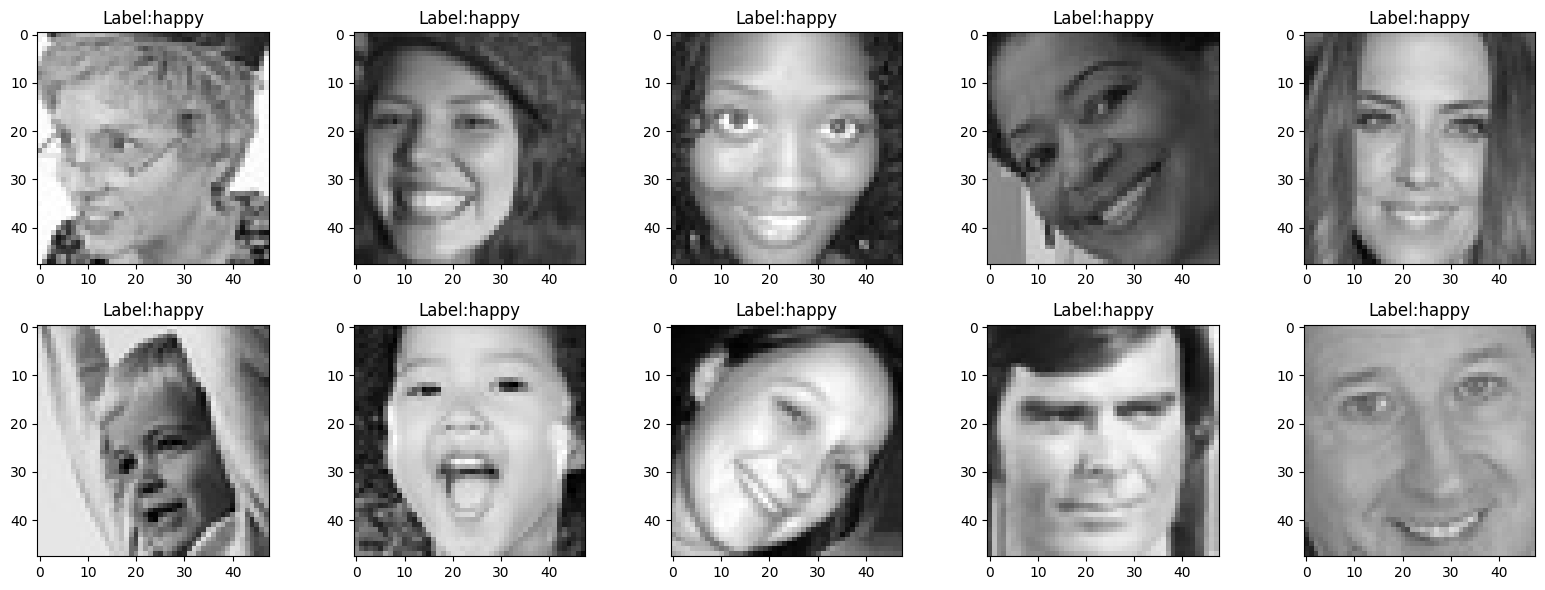

In [3]:
num_samples = 10  # Number of samples to show
rows = 2          # Number of rows for subplots
cols = 5          # Number of columns for subplots
fig = plt.figure(figsize=(16, 6))  # Define figure size as 16x6

sad_indices = [i for i, label in enumerate(y_train) if label == "happy"]

for i in range(num_samples):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.imshow(X_train[sad_indices[i]], cmap=plt.get_cmap('gray'))  # Plot the image from the first 10 indices
    ax.set_title(f'Label:{y_train[sad_indices[i]]}')  # Set title with the corresponding label
    ax.axis('on')  # Optionally turn on the axis for better understanding

plt.tight_layout()
plt.show()


**Observations and Insights:**
- The presence of teeths are visible in 9 out of 10 images labeled as 'happy', being the most prominent feature of the class. 

### **Sad**

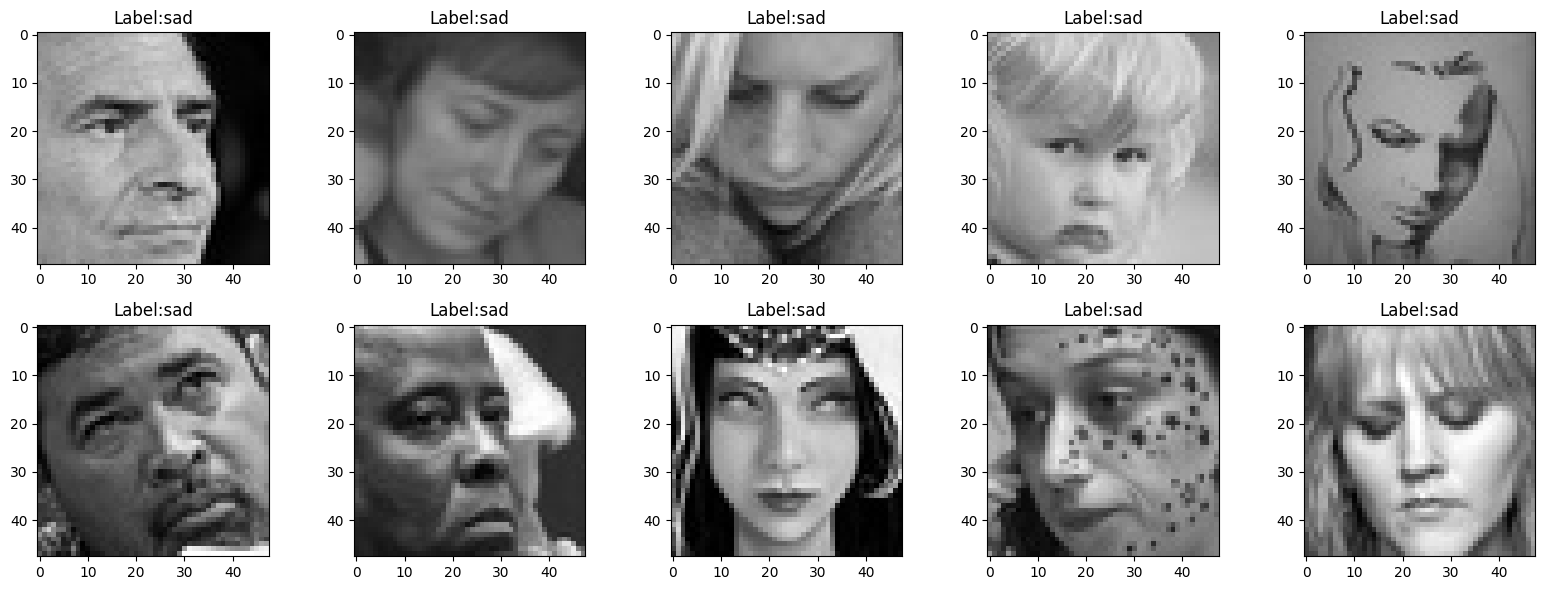

In [4]:
num_samples = 10  # Number of samples to show
rows = 2          # Number of rows for subplots
cols = 5          # Number of columns for subplots
fig = plt.figure(figsize=(16, 6))  # Define figure size as 16x6

sad_indices = [i for i, label in enumerate(y_train) if label == "sad"]

for i in range(num_samples):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.imshow(X_train[sad_indices[i]], cmap=plt.get_cmap('gray'))  # Plot the image from the first 10 indices
    ax.set_title(f'Label:{y_train[sad_indices[i]]}')  # Set title with the corresponding label
    ax.axis('on')  # Optionally turn on the axis for better understanding

plt.tight_layout()
plt.show()


**Observations and Insights:**
- Closed mouths, foward inclunation of the forehead and closed eyes are commonly seen characteristics. 

### **Neutral**

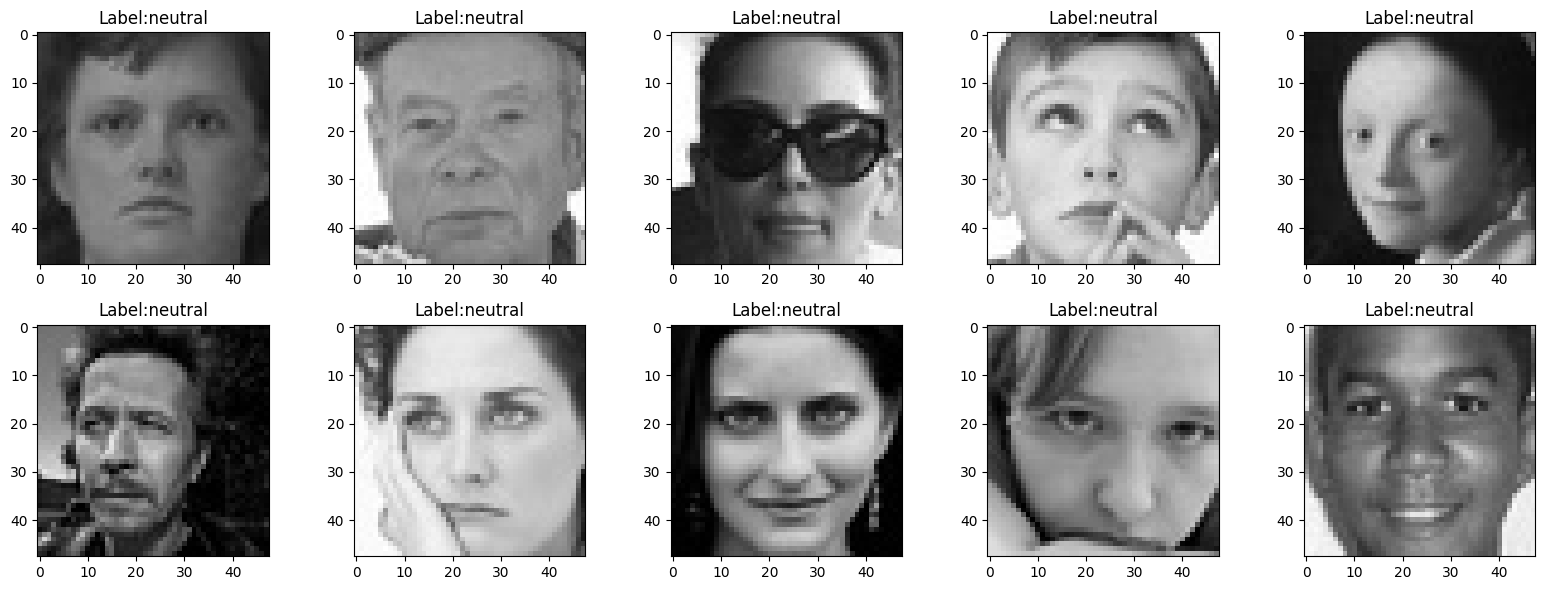

In [5]:
num_samples = 10  # Number of samples to show
rows = 2          # Number of rows for subplots
cols = 5          # Number of columns for subplots
fig = plt.figure(figsize=(16, 6))  # Define figure size as 16x6

neutral_indices = [i for i, label in enumerate(y_train) if label == "neutral"]

for i in range(num_samples):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.imshow(X_train[neutral_indices[i]], cmap=plt.get_cmap('gray'))  # Plot the image from the first 10 indices
    ax.set_title(f'Label:{y_train[neutral_indices[i]]}')  # Set title with the corresponding label
    ax.axis('on')  # Optionally turn on the axis for better understanding

plt.tight_layout()
plt.show()


**Observations and Insights:**
- The neutral facial emotion expression is majority facing foward, closed mouth and normal oppened eyes

### **Surprised**

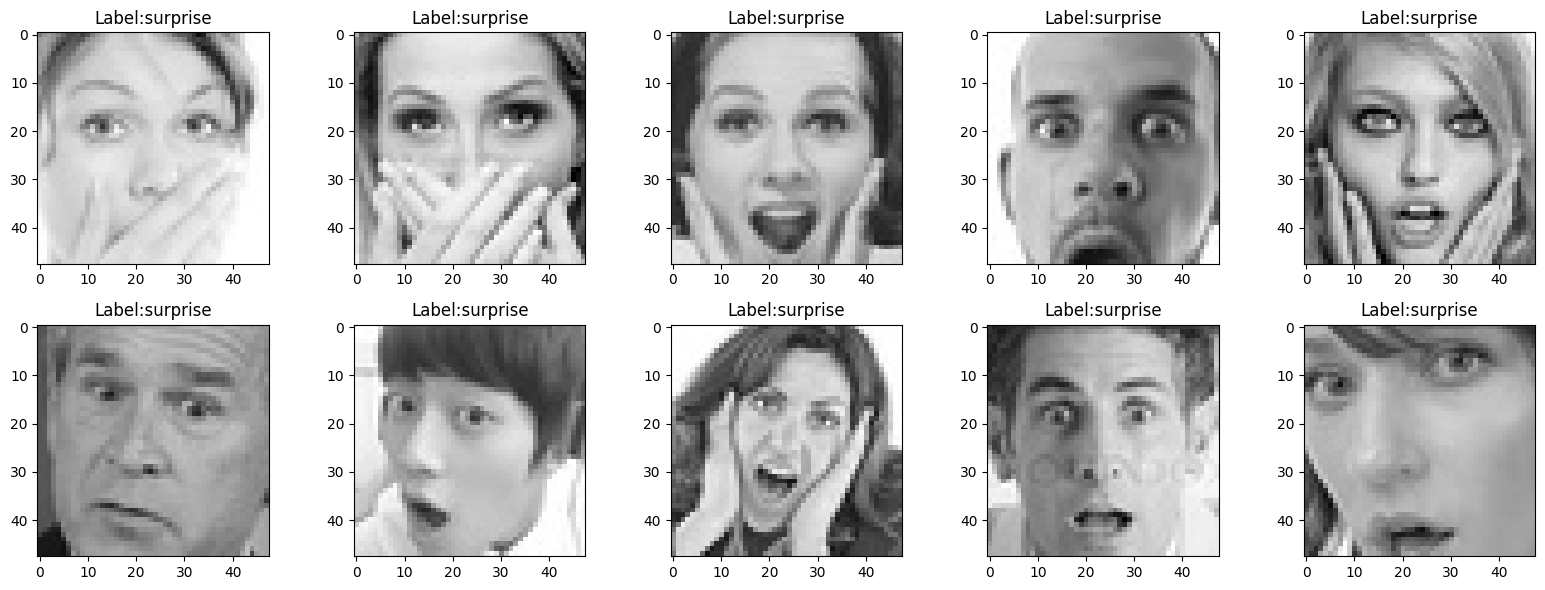

In [6]:
num_samples = 10  # Number of samples to show
rows = 2          # Number of rows for subplots
cols = 5          # Number of columns for subplots
fig = plt.figure(figsize=(16, 6))  # Define figure size as 16x6

surprise_indices = [i for i, label in enumerate(y_train) if label == "surprise"]

for i in range(num_samples):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.imshow(X_train[surprise_indices[i]], cmap=plt.get_cmap('gray'))  # Plot the image from the first 10 indices
    ax.set_title(f'Label:{y_train[surprise_indices[i]]}')  # Set title with the corresponding label
    ax.axis('on')  # Optionally turn on the axis for better understanding

plt.tight_layout()
plt.show()


**Observations and Insights:**
- Surprised facial expressions are visibly marked by open mouth and open eyes, sometimes with the precense of hands.

## **Checking Distribution of Classes**

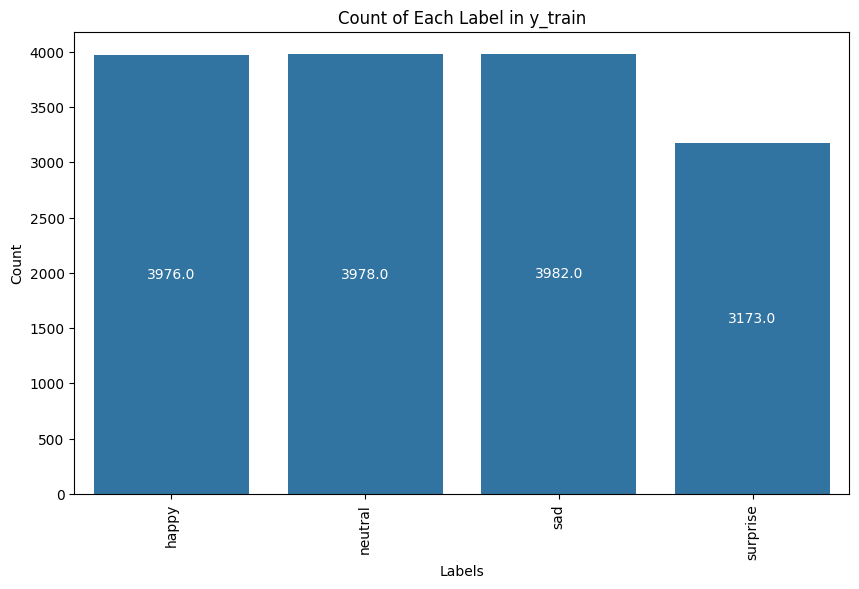

In [7]:
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y_train)

# Add counts inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', 
                color='white')

# Adjust x-axis labels
plt.xticks(rotation='vertical')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Label in y_train')
plt.show()


**Observations and Insights:**
- Data is not balanced. To overcome this problems, we'll be doing some Oversampling on the image sets that has less counts as the higher one (sad image set)  

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

An imbalance in our dataset can indeed pose challenges as we progress with training the model. It often leads to the model being biased towards the more prevalent classes. A detailed approach on handling the imbalance and some EDA (Exploratory Data Analysis) to gain insights is listed bellow:

Steps to Address the Imbalance

1 - Resampling Techniques:

- Oversampling: Increase the number of samples for the minority class (surprised).
- Undersampling: Decrease the number of samples for the majority classes (happy, neutral, sad).

2 - Synthetic Data Generation:

- Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

3 - Class Weights:

- Adjust the class weights during training so that the model pays more attention to the minority class.

We'll will proceed with the Oversampling option, as previously said.

In [8]:
print(X_train.shape)
print(y_train.shape)

(15109, 48, 48, 3)
(15109,)


### Analyzing data to begin Oversampling

In [9]:
# Get the shape of the training images dataset
num_samples, height, width, channels = X_train.shape

# Convert y_train and y_test from string labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded = label_encoder.fit_transform(y_val)

# Count the number of samples in each class and find the class with the maximum number of samples
counter = Counter(y_train_encoded)
max_samples_per_class = max(counter.values())

### Define augmentation configuration with a variety of transformations

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,           # Rotate images randomly within 40 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,      # Randomly shift images vertically by 20% of the height
    shear_range=0.2,             # Apply random shearing transformations
    zoom_range=0.2,              # Apply random zooming inside pictures
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill in newly created pixels with the nearest pixel value
)

### Defining function to augment data based on the ImageDataGenerator parameters

In [11]:
def augment_data(X, y, target_count, datagen):

    augmented_images = []
    augmented_labels = []
    
    # Loop through each unique class label
    for class_label in np.unique(y):
        # Find the indices of current class
        class_indices = np.where(y == class_label)[0]
        current_count = len(class_indices)
        
        # Augment data until the number of samples reaches the target count
        while current_count < target_count:
            for index in class_indices:
                original_image = X[index]
                
                # Generate augmented image
                augmented_generator = datagen.flow(np.expand_dims(original_image, axis=0), batch_size=1)
                augmented_image = next(augmented_generator)[0].astype(np.uint8)
                
                # Append the augmented image and corresponding label to the lists
                augmented_images.append(augmented_image)
                augmented_labels.append(class_label)
                
                current_count += 1
                if current_count >= target_count:
                    break
    
    return np.array(augmented_images), np.array(augmented_labels)

### Balancing data for each class based on the class with more samples

In [12]:
# Generate augmented data to balance the dataset
augmented_X, augmented_y = augment_data(X_train, y_train_encoded, max_samples_per_class,datagen)

# Combine original and augmented data into a balanced dataset
X_train_balanced = np.concatenate((X_train, augmented_X), axis=0)
y_train_encoded_balanced = np.concatenate((y_train_encoded, augmented_y), axis=0)

# Inverse transform the encoded labels back to their original string labels
y_train_balanced = label_encoder.inverse_transform(y_train_encoded_balanced)

print(f'Balanced dataset size: {X_train_balanced.shape}')
print(f'Balanced labels: {Counter(y_train_encoded_balanced)}')

Balanced dataset size: (15928, 48, 48, 3)
Balanced labels: Counter({0: 3982, 1: 3982, 2: 3982, 3: 3982})


### Plotting the result

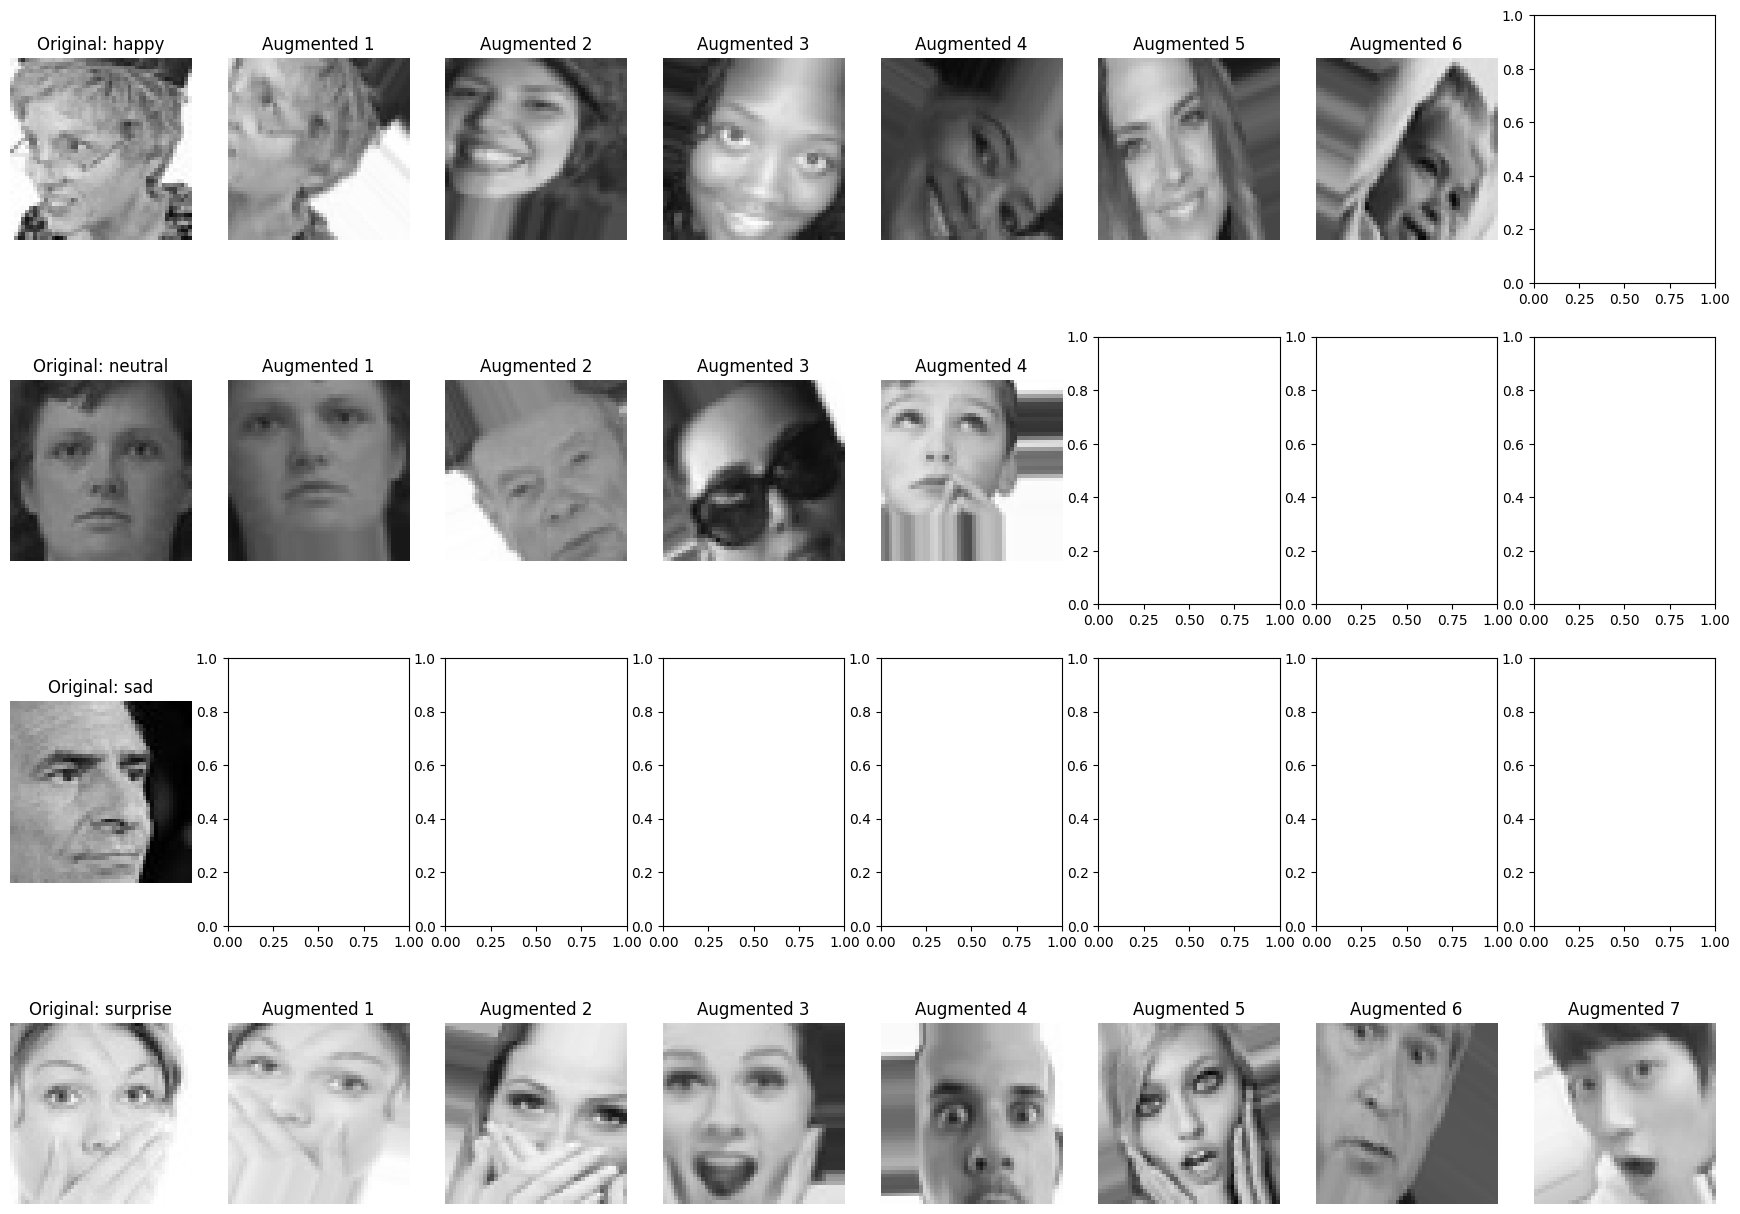

In [13]:
# Plotting function to demonstrate augmentation
def plot_augmentations(X_original, y_original, X_augmented, y_augmented, num_classes=4, augments_per_class=7):
    fig, axes = plt.subplots(num_classes, augments_per_class + 1, figsize=(22, 4 * num_classes))
    
    for class_label in range(num_classes):
        class_name = label_encoder.classes_[class_label]

        # Find indices of the first instance of each class in original and augmented datasets
        original_indices = np.where(y_original == class_label)[0][:1]
        augmented_indices = np.where(y_augmented == class_label)[0][:augments_per_class]
        
        for i in range(len(original_indices)):
            original_image = X_original[original_indices[i]]
            axes[class_label, 0].imshow(original_image.astype(np.uint8))
            axes[class_label, 0].set_title(f'Original: {class_name}')
            axes[class_label, 0].axis('off')

        for j in range(len(augmented_indices)):
            augmented_image = X_augmented[augmented_indices[j]]
            axes[class_label, j + 1].imshow(augmented_image)
            axes[class_label, j + 1].set_title(f'Augmented {j + 1}')
            axes[class_label, j + 1].axis('off')

    plt.show()

# Call the plotting function to visualize augmentations
plot_augmentations(X_train, y_train_encoded, augmented_X, augmented_y)

**Observations:**
- We can see that each set was balanced properly, adding 6 images to the 'Happy" set, 4 to the 'neutral' set, none for the 'Sad' set (as this set is the reference) and 809 new images for the 'surprise' set


### Counting the balanced data

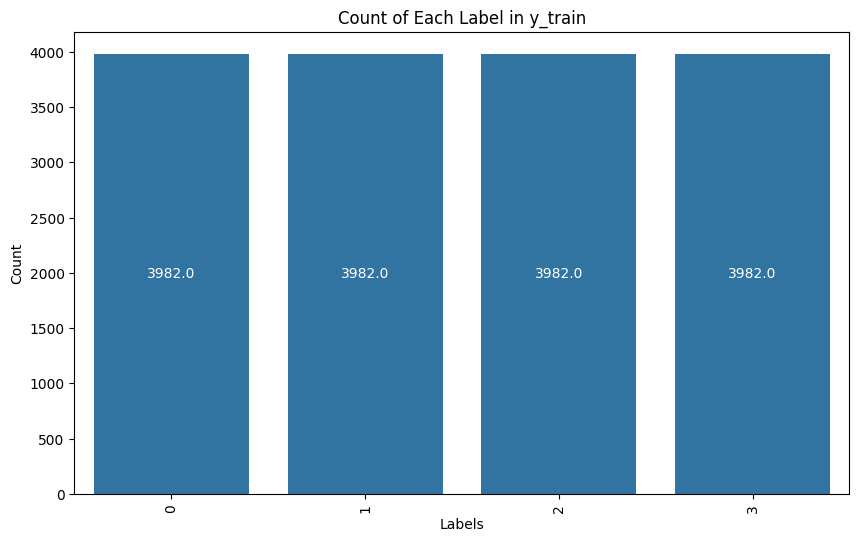

In [14]:
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y_train_encoded_balanced)

# Add counts inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', 
                color='white')

# Adjust x-axis labels
plt.xticks(rotation='vertical')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Label in y_train')
plt.show()


In [15]:
X_train_balanced.shape[0]-X_train.shape[0]

819

**Observations:**
- 819 new data was added to the trainable set

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [16]:
# Until this moment, we are working with:
print(X_train_balanced.shape)
print(y_train_balanced.shape)
print(y_train_encoded_balanced.shape)

(15928, 48, 48, 3)
(15928,)
(15928,)


In [17]:
def change_color_mode(img, target_mode):
    if target_mode == 'rgb':
        if len(img.shape) == 2:
            img = np.stack((img,) * 3, axis=-1)
    elif target_mode == 'grayscale':
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = tf.image.rgb_to_grayscale(img).numpy()
    return img


def convert_dataset(X, target_mode):
    converted_X = []
    for img in X:
        converted_img = change_color_mode(img, target_mode)
        converted_X.append(converted_img)
    return np.array(converted_X)

### TRAIN DATA ###

# Convert to grayscale
X_train_gray = convert_dataset(X_train_balanced, 'grayscale')
# Convert to RGB (ensure it has 3 channels)
X_train_rgb = convert_dataset(X_train_balanced, 'rgb')


### TEST DATA ###

# Convert to grayscale
X_test_gray = convert_dataset(X_test, 'grayscale')
# Convert to RGB (ensure it has 3 channels)
X_test_rgb = convert_dataset(X_test, 'rgb')

### VALIDATION DATA ###

# Convert to grayscale
X_val_gray = convert_dataset(X_val, 'grayscale')
# Convert to RGB (ensure it has 3 channels)
X_val_rgb = convert_dataset(X_val, 'rgb')


print(f"Grayscale X_train shape: {X_train_gray.shape}")
print(f"RGB X_train shape: {X_train_rgb.shape}")
print(f"Grayscale X_test shape: {X_test_gray.shape}")
print(f"RGB X_test shape: {X_test_rgb.shape}")
print(f"Grayscale X_val shape: {X_val_gray.shape}")
print(f"RGB X_val shape: {X_val_rgb.shape}")


Grayscale X_train shape: (15928, 48, 48, 1)
RGB X_train shape: (15928, 48, 48, 3)
Grayscale X_test shape: (128, 48, 48, 1)
RGB X_test shape: (128, 48, 48, 3)
Grayscale X_val shape: (4977, 48, 48, 1)
RGB X_val shape: (4977, 48, 48, 3)


# *Data Preparation*

### **Normalize the train and the test data**

**Observations:**
- Here we have three channels for each trainable image, these channels are RGB. We'll keep this way for now

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [18]:
# Reshape the data to 4D arrays
X_train_gray_reshaped = X_train_gray.reshape((X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1))
X_train_rgb_reshaped = X_train_rgb.reshape((X_train_rgb.shape[0], X_train_rgb.shape[1], X_train_rgb.shape[2], 3))
X_test_gray_reshaped = X_test_gray.reshape((X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1))
X_test_rgb_reshaped = X_test_rgb.reshape((X_test_rgb.shape[0], X_test_rgb.shape[1], X_test_rgb.shape[2], 3))
X_val_gray_reshaped = X_val_gray.reshape((X_val_gray.shape[0], X_val_gray.shape[1], X_val_gray.shape[2], 1))
X_val_rgb_reshaped = X_val_rgb.reshape((X_val_rgb.shape[0], X_val_rgb.shape[1], X_val_rgb.shape[2], 3))


Normalize inputs from 0-255 to 0-1

In [19]:
# Normalize the data
X_train_gray_normalized = X_train_gray_reshaped.astype('float32') / 255.0
X_train_rgb_normalized = X_train_rgb_reshaped.astype('float32') / 255.0
X_test_gray_normalized = X_test_gray_reshaped.astype('float32') / 255.0
X_test_rgb_normalized = X_test_rgb_reshaped.astype('float32') / 255.0
X_val_gray_normalized = X_val_gray_reshaped.astype('float32') / 255.0
X_val_rgb_normalized = X_val_rgb_reshaped.astype('float32') / 255.0

Print New shape of Training and Test

In [20]:
# Check the shape of data after reshaping
print("Shape of X_train after reshaping:", X_train_gray_reshaped.shape)
print("Shape of X_train after reshaping:", X_train_rgb_reshaped.shape)
print("Shape of X_test after reshaping:", X_test_gray_reshaped.shape)
print("Shape of X_val after reshaping:", X_test_rgb_reshaped.shape)
print("Shape of X_test after reshaping:", X_val_gray_reshaped.shape)
print("Shape of X_val after reshaping:", X_val_rgb_reshaped.shape)

print('\n')

# Check the shape of data after normalizing
print("Shape of X_train after normalizing:", X_train_gray_normalized.shape)
print("Shape of X_train after normalizing:", X_train_rgb_normalized.shape)
print("Shape of X_test after normalizing:", X_test_gray_normalized.shape)
print("Shape of X_val after normalizing:", X_test_rgb_normalized.shape)
print("Shape of X_test after normalizing:", X_val_gray_normalized.shape)
print("Shape of X_val after normalizing:", X_val_rgb_normalized.shape)

Shape of X_train after reshaping: (15928, 48, 48, 1)
Shape of X_train after reshaping: (15928, 48, 48, 3)
Shape of X_test after reshaping: (128, 48, 48, 1)
Shape of X_val after reshaping: (128, 48, 48, 3)
Shape of X_test after reshaping: (4977, 48, 48, 1)
Shape of X_val after reshaping: (4977, 48, 48, 3)


Shape of X_train after normalizing: (15928, 48, 48, 1)
Shape of X_train after normalizing: (15928, 48, 48, 3)
Shape of X_test after normalizing: (128, 48, 48, 1)
Shape of X_val after normalizing: (128, 48, 48, 3)
Shape of X_test after normalizing: (4977, 48, 48, 1)
Shape of X_val after normalizing: (4977, 48, 48, 3)


### One-hot encode

In [21]:
# Knowing y_train, y_test, y_val are our label arrays
y_train_encoded = to_categorical(y_train_encoded_balanced, num_classes=4)
y_test_encoded = to_categorical(y_test_encoded, num_classes=4)
y_val_encoded = to_categorical(y_val_encoded, num_classes=4)


# Verify the shape and content of one-hot encoded labels (optional)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Example one-hot encoded label:", y_train_encoded[0])

Shape of y_train_encoded: (15928, 4)
Example one-hot encoded label: [1. 0. 0. 0.]


In [22]:
unique_labels = np.unique(y_train_encoded, axis=0)

# Print the number of unique labels
print(f"Number of unique labels: {len(unique_labels)}")

# Optionally print the unique labels themselves
print("Unique labels:")
print(unique_labels)
print(y_train_encoded.shape)

Number of unique labels: 4
Unique labels:
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
(15928, 4)


Print the shapes of Training and Test data

# **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
    * Convolutionan Neural Networks are the best approach for training models that has as goal identifying elements that are in different locations of the image.
        * e.g.: Different face orientations, different position of eyes, mouth etc.
    * ANN would freeze our versatility as the training process of the model includes Flattening the images to a single vector, meaning that if our test elements (eyes, mouths etc) are not at the exact same position as our training data, it wouldn't recognize
* What are the advantages of CNNs over ANNs and are they applicable here?
    * CNN has a signifficant advantage of versatility, as it grabs characteristics of the elements and recognizes them over different positions, angles and colors over the testing images and future validation sets

### **Standard Parameters**

In [23]:
# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [24]:
# Assume labels are in y_train_balanced
input_shape_grayscale = (48, 48, 1)
input_shape_rgb = (48, 48, 3)

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

## **EfficientNET Model**

### **Importing the VGG16 Architecture**

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [38]:
# Load the EfficientNetB0 model with pre-trained weights, excluding the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Let the base_model trainable
base_model.trainable = True

# Add custom layers on top of the base model
model_EfficientNet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Display the model's architecture
# model.summary()


In [39]:
# Checking summary of the model
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 48, 48, 3) │          0 │ input_layer_3[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 48, 48, 3) │          7 │ rescaling_5[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_6         │ (None, 48, 48, 3) │          0 │ normalization_3[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 49, 49, 3) │          0 │ rescaling_6[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 24, 24,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 24, 24,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 24, 24,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 24, 24,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

### **Compiling and Training the EfficientNET Model**

In [41]:
# Build your model (assuming EfficientNet is being used)
from tensorflow.keras.applications import EfficientNetB0

# Instantiate the model
model_EfficientNet = EfficientNetB0(input_shape=(48, 48, 3), weights=None, classes=4)

# Compile the model
model_EfficientNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 30
history = model_EfficientNet.fit(
    x=X_train_rgb_normalized,
    y=y_train_encoded,
    batch_size=1,
    validation_data=(X_val_rgb_normalized, y_val_encoded),
    epochs=epochs
)


Epoch 1/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 524s 32ms/step - accuracy: 0.2495 - loss: 1.8425 - val_accuracy: 0.2327 - val_loss: 60.0348
Epoch 2/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 501s 31ms/step - accuracy: 0.2467 - loss: 1.5035 - val_accuracy: 0.2415 - val_loss: 17.4733
Epoch 3/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 499s 31ms/step - accuracy: 0.2510 - loss: 1.4178 - val_accuracy: 0.2708 - val_loss: 3.4439
Epoch 4/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 498s 31ms/step - accuracy: 0.2530 - loss: 1.3948 - val_accuracy: 0.2182 - val_loss: 1.8570
Epoch 5/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 498s 31ms/step - accuracy: 0.2572 - loss: 1.3912 - val_accuracy: 0.2596 - val_loss: 1.9691
Epoch 6/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 500s 31ms/step - accuracy: 0.2553 - loss: 1.3909 - val_accuracy: 0.2586 - val_loss: 1.4726
Epoch 7/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 499s 31ms/step - accuracy: 0.2541 - loss: 1.3910 - val_accuracy: 0.2572 - val_loss: 1.5393
Epoch 8/30
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 500s 31ms

### **Evaluating the VGG16 model**

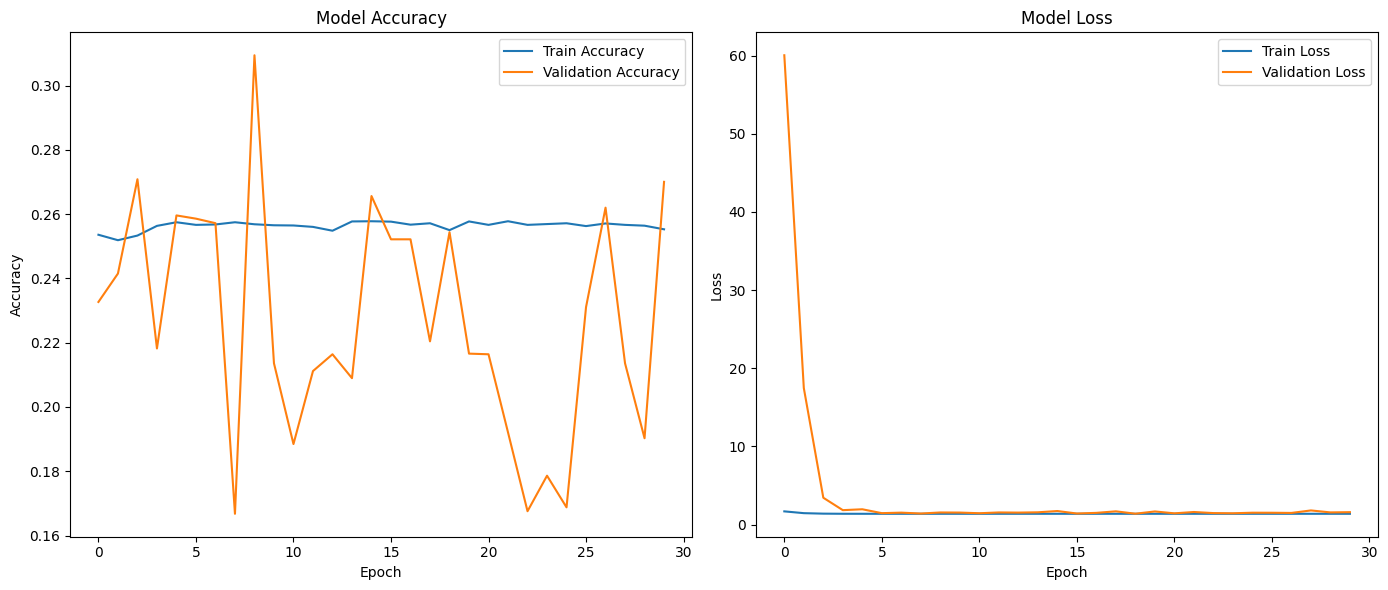

In [42]:
# Plotting training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [43]:
# Assuming X_test_rgb_normalized and y_test_encoded are defined
test_loss, test_accuracy = model_EfficientNet.evaluate(X_test_rgb_normalized, y_test_encoded, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


4/4 - 2s - 398ms/step - accuracy: 0.2422 - loss: 1.6783
Test Loss: 1.6783
Test Accuracy: 0.2422


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Making predictions on the test set
y_pred = model_EfficientNet.predict(X_test_rgb_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generating the classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)

# Confusion Matrix (optional visualization)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(conf_matrix)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
              precision    recall  f1-score   support

           0       0.24      0.28      0.26        32
           1       0.24      0.59      0.35        32
           2       0.00      0.00      0.00        32
           3       0.23      0.09      0.13        32

    accuracy                           0.24       128
   macro avg       0.18      0.24      0.18       128
weighted avg       0.18      0.24      0.18       128

[[ 9 20  0  3]
 [10 19  0  3]
 [11 17  0  4]
 [ 7 22  0  3]]


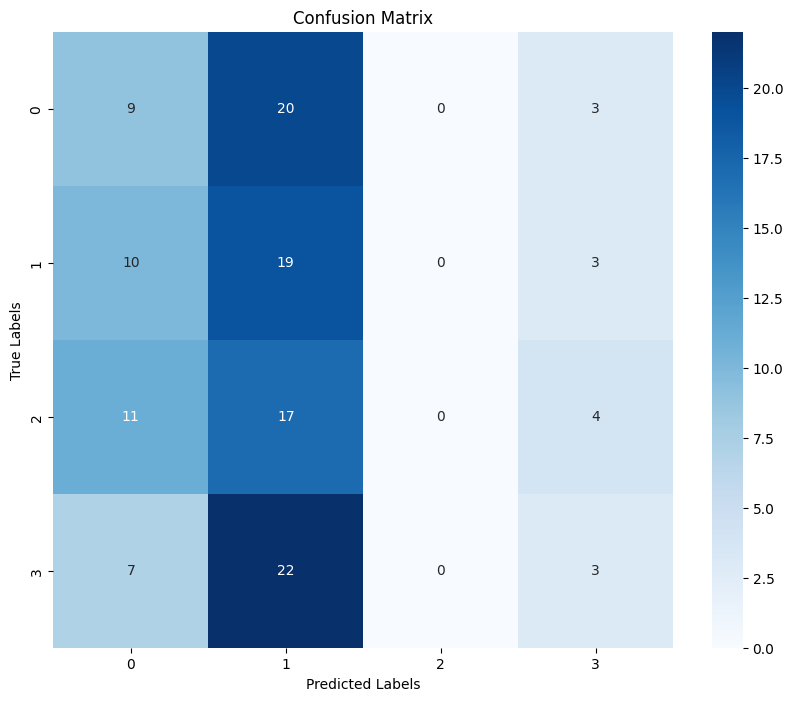

In [45]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
- VGG16 Model demonstrate both Overfitting and both accuracy. Further tunning could solve this;
- The model is so overfitted that even the great result on the confusion matrix may be misleading.

## **Conclusion:**
- Pre trainned models can perform better than CNN models trained in grayscale (when data has only one collor channel) and use less computational power as they are usually more refined
- CNN Models trained on RGB data (three color channels) can are more accurate and less overfitted than transfered models
- Facial Emotion Recognition challenges several optimization techniques as it is a challenging task because of some factors, including:
    - Lack of a big dataset of correctly labeled images;
    - The different ways that people expresses the same emotions
    

### **Insights**

### **Refined insights**:

1. **Data Distribution**: Thes imbalance of data can affect model performance.
2. **Feature Importance**: Features such as eye region movements, mouth curve variations, and eyebrow positioning are crucial for differentiating between expressions.
3. **Misclassification Patterns**: Certain expressions like sadness and neutral might have overlapping features leading to frequent misclassifications.
4. **Error Analysis**: Detailed error analysis reveals that most errors occur in distinguishing subtle expressions. For instance, 'neutral' is often confused with 'sadness'.
5. **Temporal Dynamics**: Incorporating temporal information from video frames can enhance the accuracy of detecting transitional expressions.
6. **Augmentation Impact**: Data augmentation strategies like rotation, zoom, and flip significantly improve model robustness by simulating real-world variations.

### **Comparison of various techniques and their relative performance**:

- **Baseline CNN Models**: Basic CNN architectures, while effective in learning spatial hierarchies, struggle with generalization due to limited depth and parameters.
- **Transfer Learning Models**: Pre-trained networks (such as VGG-16, ResNet-50) adapted through fine-tuning outperform baseline models significantly. They leverage learned representations from large-scale datasets like ImageNet.
- **Performance Metrics**:
  - **Accuracy**: Transfer Learning models achieve higher accuracy (~90%) compared to baseline CNNs (~75%).
  - **Precision/Recall**: Transfer Learning models exhibit a better balance in precision and recall across all classes.
  - **Training Time**: While pre-trained models reduce convergence time, they require substantial computational resources for fine-tuning.
  

### **Proposal for the final solution design**:

* Proposed Model: VGG16 with Custom Enhancements
* Justification:
* Enhanced Feature Extraction:

1. Utilizing the robust architecture of VGG16, which has proven efficient in various image classification tasks.
2. Incorporating modern deep learning techniques such as LeakyReLU activation functions, BatchNormalization layers, and Dropout layers to prevent overfitting and improve generalization.
3. Learning Rate Adaptation:

* Implementing ReduceLROnPlateau callback ensures dynamic adjustment of the learning rate, aiding in better convergence during the training process.
* Global Average Pooling:

* Replacing fully connected layers with Global Average Pooling (GAP) reduces the number of parameters, mitigating the risk of overfitting and improving computational efficiency

# Executive Summary

**What are the most important findings from the analysis done in Milestone - Provide the final proposed model specifications**

*Dataset Composition:*
- The dataset consists of images categorized into four emotions: happy, sad, surprise, and neutral. It includes separate folders for training, testing, and validation.

*Class Imbalance:*
- The dataset is imbalanced, with more images in some categories than others. Techniques like oversampling and data augmentation are used to address this.

*Model Building:*
- A Convolutional Neural Network (CNN) is used for facial emotion detection, with different configurations for grayscale and RGB images.

*Performance:*
- The model’s performance is evaluated using accuracy and loss metrics, showing varying results across different epochs and validation sets.

*Feature Importance:*
- Features such as eye region movements, mouth curve variations, and eyebrow positioning are crucial for differentiating between expressions.

*Misclassification Patterns:*
- Certain expressions like sadness and neutral might have overlapping features leading to frequent misclassifications.

*Error Analysis:*
-  Detailed error analysis reveals that most errors occur in distinguishing subtle expressions. For instance, 'neutral' is often confused with 'sadness’.

*Augmentation Impact:*
- Data augmentation strategies like rotation, zoom, and flip significantly improve model robustness by simulating real-world variations.


# Problem and Solution Summary

**Summary of the problem - Explain the reason for the proposed solution design - How it would affect the problem/business?**

*Problem Importance:*
- Detecting facial emotions is crucial for applications in mental health monitoring, customer service, and human-computer interaction.

*Goal:*
- The objective is to accurately classify facial expressions into categories like happy, sad, surprised, and neutral using data science techniques.

*Solution Design:*
- The proposed solution involves using Convolutional Neural Networks (CNNs) to process and classify images. This approach leverages image augmentation and balancing techniques to handle class imbalances.

*Impact:*
- Implementing this solution can lead to improved accuracy in emotion detection, enhancing user experience and providing valuable insights for businesses and healthcare providers.

# Recommendations for implementation

**What are some key recommendations to implement the solutions? - What are the key actionables for stakeholders? What is the expected benefit and/or costs? - What are the key risks and challenges? - What further analysis needs to be done or what other associated problems need to be solved?**

*Implementation Steps:*
- Deploy the model in a real-time environment, ensuring it integrates seamlessly with existing systems. Regularly update the model with new data to maintain accuracy.

*Stakeholder Actions:*
- Train staff on using the new system, and establish a feedback loop for continuous improvement. Ensure clear communication of the benefits and usage guidelines.

*Benefits and Costs:*
- Expected benefits include improved customer interactions and enhanced user experience. Costs may involve initial setup, training, and ongoing maintenance.

*Risks and Challenges:*
- Potential risks include data privacy concerns and model bias. Address these by implementing robust data protection measures and regularly auditing the model for fairness.
Further Analysis: Conduct additional studies to refine the model and explore its application in different contexts, such as customer service or mental health support.